In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



ModuleNotFoundError: No module named 'matplotlib'

In [7]:
# Load the dataset
try:
    df = pd.read_csv('data_medicion.csv')
except Exception as e:
    print(f"Error loading CSV: {e}")
    # As a fallback for analysis, create a dummy dataframe if the file is not found or corrupted
    df = pd.DataFrame()

if not df.empty:
    # Display basic information about the dataframe
    print("Información básica del DataFrame:")
    df.info()

    print("\nPrimeras 5 filas del DataFrame:")
    print(df.head())

    print("\nEstadísticas descriptivas de las columnas numéricas:")
    print(df.describe())
else:
    print("El DataFrame está vacío, no se puede continuar con el análisis.")

Información básica del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8656 entries, 0 to 8655
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timestamp               8656 non-null   int64  
 1   a_total_act_energy      8656 non-null   float64
 2   a_fund_act_energy       8656 non-null   float64
 3   a_total_act_ret_energy  8656 non-null   float64
 4   a_fund_act_ret_energy   8656 non-null   float64
 5   a_lag_react_energy      8656 non-null   float64
 6   a_lead_react_energy     8656 non-null   float64
 7   a_max_act_power         8656 non-null   float64
 8   a_min_act_power         8656 non-null   float64
 9   a_max_aprt_power        8656 non-null   float64
 10  a_min_aprt_power        8656 non-null   float64
 11  a_max_voltage           8656 non-null   float64
 12  a_min_voltage           8656 non-null   float64
 13  a_avg_voltage           8656 non-null   float64
 14  a_max_

DataFrame Limpio y Preparado (primeras 5 filas):
                     total_act_power  hora_del_dia  dia_de_la_semana  \
timestamp                                                              
2023-01-16 15:43:00             1.10            15                 0   
2023-01-16 15:44:00             1.15            15                 0   
2023-01-16 15:45:00             1.20            15                 0   
2023-01-16 15:46:00             1.10            15                 0   
2023-01-16 15:47:00             1.20            15                 0   

                     hora_sin  hora_cos  dia_sin  dia_cos  
timestamp                                                  
2023-01-16 15:43:00 -0.707107 -0.707107      0.0      1.0  
2023-01-16 15:44:00 -0.707107 -0.707107      0.0      1.0  
2023-01-16 15:45:00 -0.707107 -0.707107      0.0      1.0  
2023-01-16 15:46:00 -0.707107 -0.707107      0.0      1.0  
2023-01-16 15:47:00 -0.707107 -0.707107      0.0      1.0  

Se ha generado un gráfico

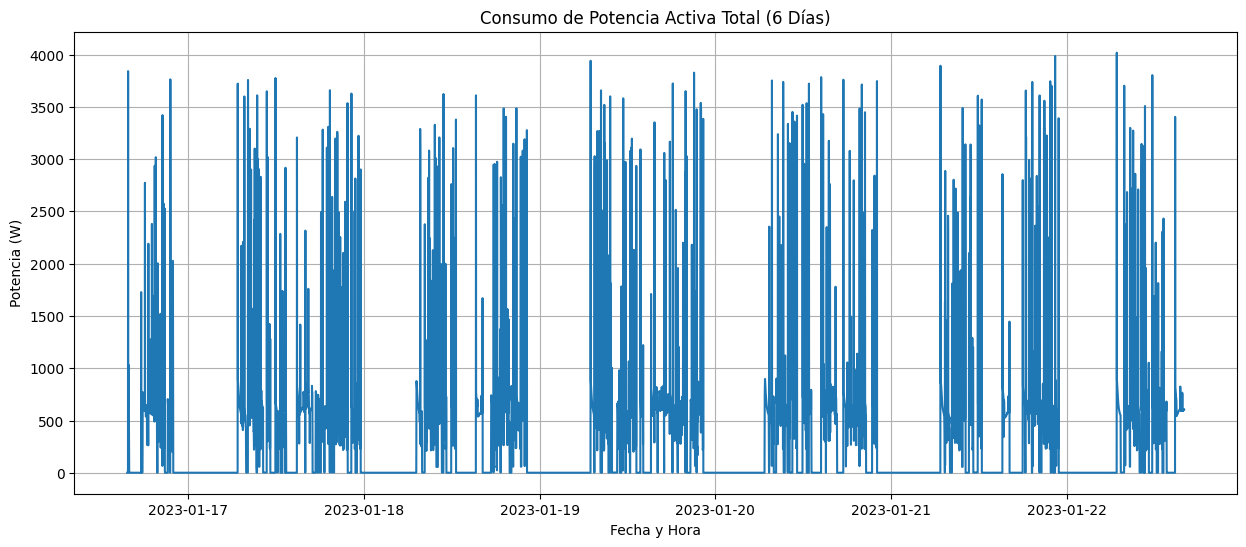

In [8]:


# --- 1. Limpieza y Formateo ---
# Convertir el timestamp de Unix a datetime y ponerlo como índice
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.set_index('timestamp', inplace=True)

# --- 2. Crear Métrica de Potencia Principal ---
# Calculamos la potencia activa promedio para cada fase en ese minuto
df['a_avg_act_power'] = (df['a_min_act_power'] + df['a_max_act_power']) / 2
df['b_avg_act_power'] = (df['b_min_act_power'] + df['b_max_act_power']) / 2
df['c_avg_act_power'] = (df['c_min_act_power'] + df['c_max_act_power']) / 2

# Sumamos las potencias promedio de cada fase para obtener la potencia total
df['total_act_power'] = df['a_avg_act_power'] + df['b_avg_act_power'] + df['c_avg_act_power']

# --- 3. Ingeniería de Características Cíclicas ---
df['hora_del_dia'] = df.index.hour
df['dia_de_la_semana'] = df.index.dayofweek # Lunes=0, Domingo=6

# Transformación Seno/Coseno para la Hora
df['hora_sin'] = np.sin((df['hora_del_dia'] / 24) * 2 * np.pi)
df['hora_cos'] = np.cos((df['hora_del_dia'] / 24) * 2 * np.pi)

# Transformación Seno/Coseno para el Día
df['dia_sin'] = np.sin((df['dia_de_la_semana'] / 7) * 2 * np.pi)
df['dia_cos'] = np.cos((df['dia_de_la_semana'] / 7) * 2 * np.pi)


# --- 4. Crear un DataFrame Limpio ---
# Seleccionamos solo las columnas que nos interesan para los modelos
df_limpio = df[['total_act_power', 'hora_del_dia', 'dia_de_la_semana', 'hora_sin', 'hora_cos', 'dia_sin', 'dia_cos']].copy()

print("DataFrame Limpio y Preparado (primeras 5 filas):")
print(df_limpio.head())

# Visualicemos el consumo total a lo largo de los 6 días
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(df_limpio.index, df_limpio['total_act_power'])
plt.title('Consumo de Potencia Activa Total (6 Días)')
plt.xlabel('Fecha y Hora')
plt.ylabel('Potencia (W)')
plt.grid(True)
plt.savefig('consumo_6_dias.png')

print("\nSe ha generado un gráfico 'consumo_6_dias.png' con la visión general del consumo.")


Análisis de los Clusters de Consumo:
          count         mean         std      min        25%       50%  \
cluster                                                                  
0        3071.0   368.541697  309.088596     1.10     1.2500   550.600   
1        2513.0     1.271230    2.392818     1.10     1.1000     1.150   
2         270.0  2821.591481  627.105728  1622.05  2300.9875  2907.175   
3        2802.0   321.336064  308.574141     1.10     1.2000   341.125   

               75%      max  
cluster                      
0         613.4750  1600.55  
1           1.2000    72.75  
2        3319.1750  4017.15  
3         586.5875  1569.50  

Se ha generado un gráfico 'clusters_consumo.png' con los patrones de consumo identificados.


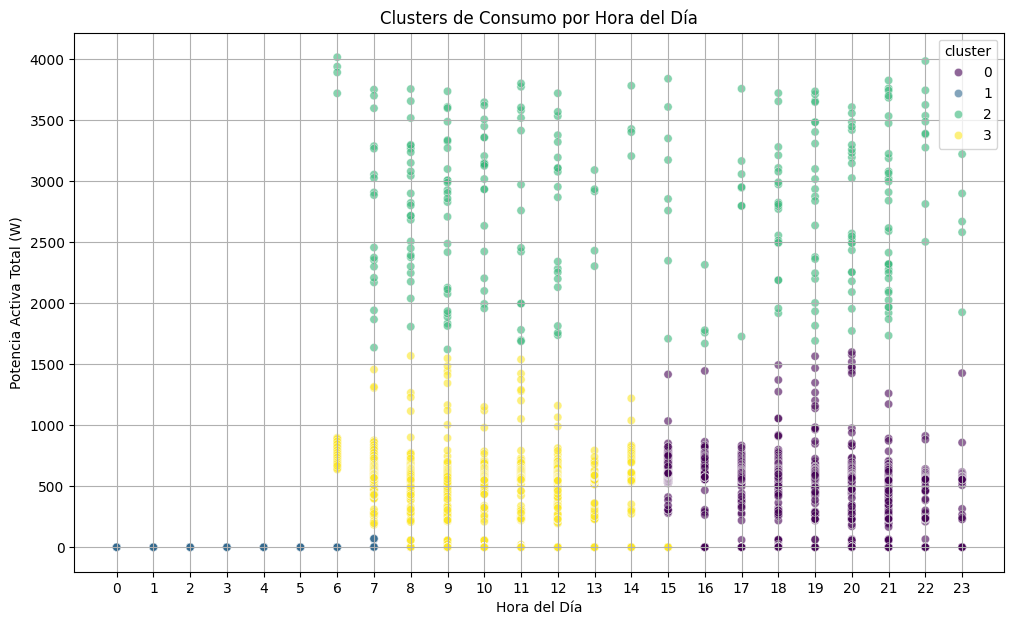

In [9]:
#ALGOTIMO PARA CLOSTERING
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las características para el clustering
features_cluster = df_limpio[['hora_del_dia', 'total_act_power']]

# Escalar las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_cluster)

# Aplicar el algoritmo K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_limpio['cluster'] = kmeans.fit_predict(features_scaled)

# Analizar los clusters resultantes
print("\nAnálisis de los Clusters de Consumo:")
cluster_analysis = df_limpio.groupby('cluster')['total_act_power'].describe()
print(cluster_analysis)

# Visualizar los clusters
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_limpio, x='hora_del_dia', y='total_act_power', hue='cluster', palette='viridis', alpha=0.6)
plt.title('Clusters de Consumo por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Potencia Activa Total (W)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.savefig('clusters_consumo.png')

print("\nSe ha generado un gráfico 'clusters_consumo.png' con los patrones de consumo identificados.")


El Error Absoluto Medio (MAE) del modelo de regresión es: 254.60 Watts
Esto significa que, en promedio, las predicciones del modelo se desvían en esa cantidad del valor real.

Se ha generado un gráfico 'prediccion_vs_real.png' comparando el consumo real con la predicción.


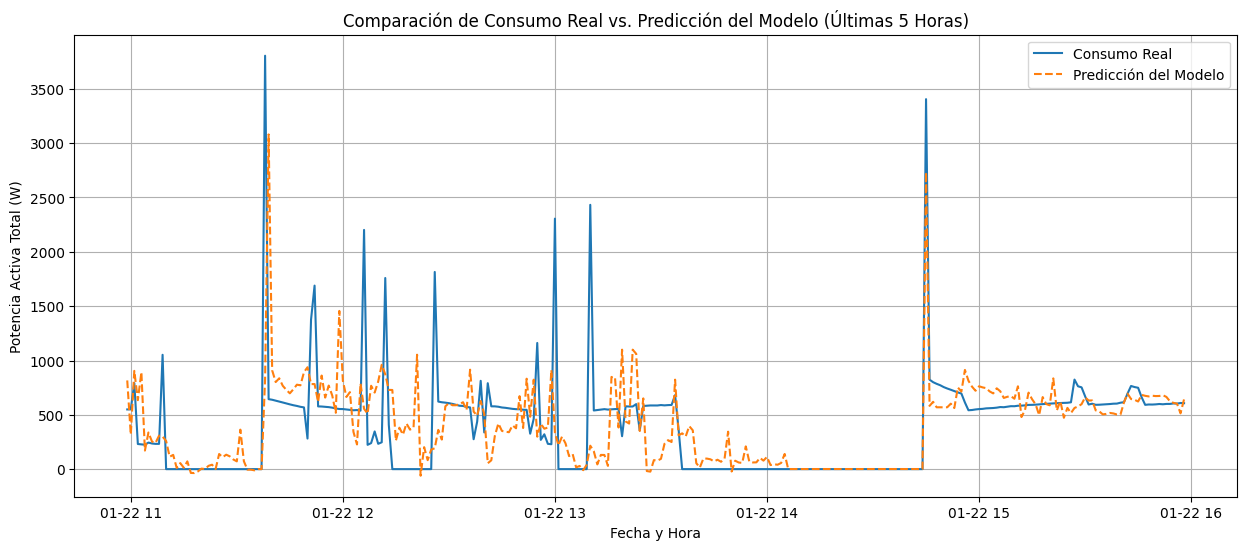

In [10]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# --- 1. Ingeniería de Características (Lags y Rolling) ---
df_reg = df_limpio.copy()
# Creamos lags (valores de minutos anteriores)
df_reg['power_lag_15m'] = df_reg['total_act_power'].shift(15)
df_reg['power_lag_30m'] = df_reg['total_act_power'].shift(30)

# Creamos rolling features (promedio y max de la última media hora)
df_reg['power_roll_mean_30m'] = df_reg['total_act_power'].rolling(window=30).mean()
df_reg['power_roll_max_30m'] = df_reg['total_act_power'].rolling(window=30).max()

# Eliminar filas con NaN creadas por las operaciones de lag/rolling
df_reg.dropna(inplace=True)


# --- 2. Definir Características (X) y Objetivo (y) ---
X = df_reg[['hora_sin', 'hora_cos', 'dia_sin', 'dia_cos', 'power_lag_15m', 'power_lag_30m', 'power_roll_mean_30m', 'power_roll_max_30m']]
y = df_reg['total_act_power']


# --- 3. Dividir Datos y Entrenar el Modelo ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False) # shuffle=False es importante para series de tiempo

xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.05, n_jobs=-1)
xgbr.fit(X_train, y_train)


# --- 4. Evaluar y Visualizar ---
predictions = xgbr.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"\nEl Error Absoluto Medio (MAE) del modelo de regresión es: {mae:.2f} Watts")
print("Esto significa que, en promedio, las predicciones del modelo se desvían en esa cantidad del valor real.")

# Crear un DataFrame para la visualización
df_results = pd.DataFrame({'real': y_test, 'prediccion': predictions}, index=y_test.index)

# Graficar los últimos 300 minutos (5 horas) de la predicción vs el real
plt.figure(figsize=(15, 6))
plt.plot(df_results.index[-300:], df_results['real'][-300:], label='Consumo Real')
plt.plot(df_results.index[-300:], df_results['prediccion'][-300:], label='Predicción del Modelo', linestyle='--')
plt.title('Comparación de Consumo Real vs. Predicción del Modelo (Últimas 5 Horas)')
plt.xlabel('Fecha y Hora')
plt.ylabel('Potencia Activa Total (W)')
plt.legend()
plt.grid(True)
plt.savefig('prediccion_vs_real.png')

print("\nSe ha generado un gráfico 'prediccion_vs_real.png' comparando el consumo real con la predicción.")

--- CONTEO DE ETIQUETAS CREADAS ---
estado
Normal              6130
Consumo Fantasma    2306
Bajo Rendimiento     191
Name: count, dtype: int64
-----------------------------------

--- REPORTE DE CLASIFICACIÓN ---
Este reporte nos dice qué tan bien el modelo predice cada categoría:
                  precision    recall  f1-score   support

Bajo Rendimiento       0.00      0.00      0.00         0
Consumo Fantasma       1.00      0.42      0.59       978
          Normal       0.76      0.99      0.86      1611

        accuracy                           0.78      2589
       macro avg       0.59      0.47      0.48      2589
    weighted avg       0.85      0.78      0.76      2589

-----------------------------------

--- MATRIZ DE CONFUSIÓN ---
Nos muestra cuántas veces el modelo acertó y en qué se confundió:
                  Bajo Rendimiento  Consumo Fantasma  Normal
Bajo Rendimiento                 0                 0       0
Consumo Fantasma                62               411   

C:\Users\Renato\PycharmProjects\EnergIA\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Renato\PycharmProjects\EnergIA\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Renato\PycharmProjects\EnergIA\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result


Se ha generado un gráfico 'matriz_confusion_clf.png' con la Matriz de Confusión.


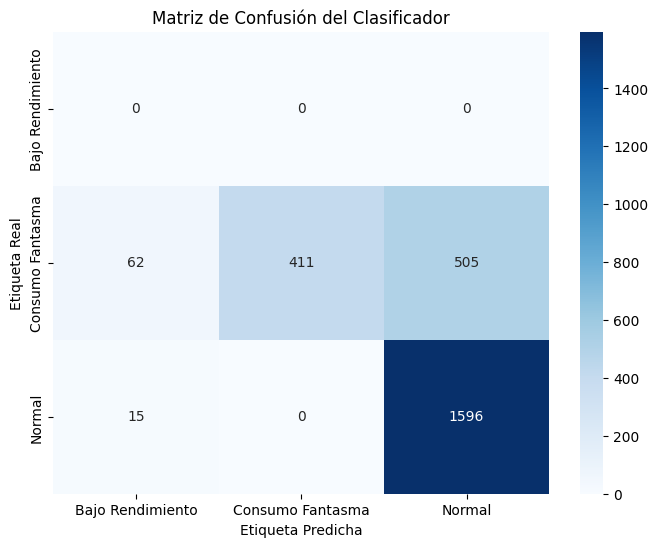

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix

# --- PASO 0: Cargar y Preparar los Datos ---
try:
    df = pd.read_csv('data_medicion.csv')
    # (El resto del código de preparación es el mismo que el anterior)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
    df.set_index('timestamp', inplace=True)
    df['a_avg_act_power'] = (df['a_min_act_power'] + df['a_max_act_power']) / 2
    df['b_avg_act_power'] = (df['b_min_act_power'] + df['b_max_act_power']) / 2
    df['c_avg_act_power'] = (df['c_min_act_power'] + df['c_max_act_power']) / 2
    df['total_act_power'] = df['a_avg_act_power'] + df['b_avg_act_power'] + df['c_avg_act_power']
    df['hora_del_dia'] = df.index.hour
    df['dia_de_la_semana'] = df.index.dayofweek
    df['es_horario_laboral'] = (df['hora_del_dia'] >= 8) & (df['hora_del_dia'] < 18) & (df['dia_de_la_semana'] < 5)
    df['hora_sin'] = np.sin((df['hora_del_dia'] / 24) * 2 * np.pi)
    df['hora_cos'] = np.cos((df['hora_del_dia'] / 24) * 2 * np.pi)
    df['dia_sin'] = np.sin((df['dia_de_la_semana'] / 7) * 2 * np.pi)
    df['dia_cos'] = np.cos((df['dia_de_la_semana'] / 7) * 2 * np.pi)
    df_limpio = df[['total_act_power', 'hora_sin', 'hora_cos', 'dia_sin', 'dia_cos', 'es_horario_laboral']].copy()

except FileNotFoundError:
    print("Error: El archivo 'emdata_2CBCBBA6337C.csv' no fue encontrado.")
    exit()

# --- PASO 1: Ejecutar el Modelo de Regresión para obtener el error ---
df_reg = df_limpio.copy()
df_reg['power_lag_15m'] = df_reg['total_act_power'].shift(15)
df_reg['power_roll_mean_30m'] = df_reg['total_act_power'].rolling(window=30).mean()
df_reg.dropna(inplace=True)

X_reg = df_reg[['hora_sin', 'hora_cos', 'dia_sin', 'dia_cos', 'power_lag_15m', 'power_roll_mean_30m']]
y_reg = df_reg['total_act_power']

# Entrenamos un modelo de regresión sobre TODOS los datos para obtener las predicciones
rfr = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rfr.fit(X_reg, y_reg)
predicciones_reg = rfr.predict(X_reg)
mae = mean_absolute_error(y_reg, predicciones_reg)

# Añadimos el error de predicción a nuestro dataframe
df_reg['prediccion'] = predicciones_reg
df_reg['error_abs'] = abs(df_reg['total_act_power'] - df_reg['prediccion'])

# --- PASO 2: Creación de Etiquetas (Data Labeling) ---
# Esta es la parte donde aplicamos nuestra lógica de negocio para crear la "respuesta correcta"
df_labeled = df_reg.copy()
df_labeled['estado'] = 'Normal' # Empezamos asumiendo que todo es normal

# Regla 1: Etiquetar Consumo Fantasma
# Si es fuera de horario laboral Y el consumo es mayor a un umbral (ej. 100W)
df_labeled.loc[(df_labeled['es_horario_laboral'] == False) & (df_labeled['total_act_power'] > 100), 'estado'] = 'Consumo Fantasma'

# Regla 2: Etiquetar Bajo Rendimiento
# Si el error de predicción es muy alto (ej. 4 veces el error promedio) Y estamos en horario laboral
umbral_anomalia = mae * 4
df_labeled.loc[(df_labeled['error_abs'] > umbral_anomalia) & (df_labeled['es_horario_laboral'] == True), 'estado'] = 'Bajo Rendimiento'

print("--- CONTEO DE ETIQUETAS CREADAS ---")
print(df_labeled['estado'].value_counts())
print("-" * 35)


# --- PASO 3: Entrenar el Modelo de Clasificación ---
# Ahora usamos estas etiquetas para entrenar un nuevo modelo que aprenda a diagnosticarlas

# Definimos las características (X) y el objetivo (y) para el clasificador
X_clf = df_labeled[['total_act_power', 'hora_sin', 'hora_cos', 'dia_sin', 'dia_cos', 'error_abs']]
y_clf = df_labeled['estado']

# Dividimos los datos para entrenar y probar el clasificador
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42, shuffle=False)

# Crear y entrenar el modelo RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rfc.fit(X_train, y_train)

# --- PASO 4: Evaluar el Clasificador ---
predicciones_clf = rfc.predict(X_test)

print("\n--- REPORTE DE CLASIFICACIÓN ---")
print("Este reporte nos dice qué tan bien el modelo predice cada categoría:")
print(classification_report(y_test, predicciones_clf))
print("-" * 35)

# Matriz de Confusión
print("\n--- MATRIZ DE CONFUSIÓN ---")
print("Nos muestra cuántas veces el modelo acertó y en qué se confundió:")
cm = confusion_matrix(y_test, predicciones_clf, labels=rfc.classes_)
df_cm = pd.DataFrame(cm, index=rfc.classes_, columns=rfc.classes_)
print(df_cm)

# Visualizar la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
plt.title('Matriz de Confusión del Clasificador')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.savefig('matriz_confusion_clf.png')
print("\nSe ha generado un gráfico 'matriz_confusion_clf.png' con la Matriz de Confusión.")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# --- CAMBIO AQUÍ 1: Importar SMOTE ---
from imblearn.over_sampling import SMOTE

# --- PASO 0: Cargar y Preparar los Datos ---
try:
    df = pd.read_csv('data_medicion.csv')
    # (El resto del código de preparación es el mismo)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
    df.set_index('timestamp', inplace=True)
    df['a_avg_act_power'] = (df['a_min_act_power'] + df['a_max_act_power']) / 2
    df['b_avg_act_power'] = (df['b_min_act_power'] + df['b_max_act_power']) / 2
    df['c_avg_act_power'] = (df['c_min_act_power'] + df['c_max_act_power']) / 2
    df['total_act_power'] = df['a_avg_act_power'] + df['b_avg_act_power'] + df['c_avg_act_power']
    df['hora_del_dia'] = df.index.hour
    df['es_horario_laboral'] = (df.index.hour >= 8) & (df.index.hour < 18) & (df.index.dayofweek < 5)
    df['hora_sin'] = np.sin((df['hora_del_dia'] / 24) * 2 * np.pi)
    df['hora_cos'] = np.cos((df['hora_del_dia'] / 24) * 2 * np.pi)
    df['dia_sin'] = np.sin((df.index.dayofweek / 7) * 2 * np.pi)
    df['dia_cos'] = np.cos((df.index.dayofweek / 7) * 2 * np.pi)
    df_limpio = df[['total_act_power', 'hora_sin', 'hora_cos', 'dia_sin', 'dia_cos', 'es_horario_laboral']].copy()
except FileNotFoundError:
    print("Error: El archivo 'emdata_2CBCBBA6337C.csv' no fue encontrado.")
    exit()

# --- PASO 1: Ejecutar Regresión para obtener el error ---
df_reg = df_limpio.copy()
df_reg['power_lag_15m'] = df_reg['total_act_power'].shift(15)
df_reg['power_roll_mean_30m'] = df_reg['total_act_power'].rolling(window=30).mean()
df_reg.dropna(inplace=True)

X_reg = df_reg[['hora_sin', 'hora_cos', 'dia_sin', 'dia_cos', 'power_lag_15m', 'power_roll_mean_30m']]
y_reg = df_reg['total_act_power']

rfr = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rfr.fit(X_reg, y_reg)
predicciones_reg = rfr.predict(X_reg)
mae = np.mean(abs(y_reg - predicciones_reg))

df_reg['prediccion'] = predicciones_reg
df_reg['error_abs'] = abs(df_reg['total_act_power'] - df_reg['prediccion'])

# --- PASO 2: Creación de Etiquetas (Data Labeling) ---
df_labeled = df_reg.copy()
df_labeled['estado'] = 'Normal'
df_labeled.loc[(df_labeled['es_horario_laboral'] == False) & (df_labeled['total_act_power'] > 100), 'estado'] = 'Consumo Fantasma'
umbral_anomalia = mae * 4
df_labeled.loc[(df_labeled['error_abs'] > umbral_anomalia) & (df_labeled['es_horario_laboral'] == True), 'estado'] = 'Bajo Rendimiento'

# --- PASO 3: Entrenar el Modelo de Clasificación ---
X_clf = df_labeled[['total_act_power', 'hora_sin', 'hora_cos', 'dia_sin', 'dia_cos', 'error_abs']]
y_clf = df_labeled['estado']

X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42, shuffle=False)

# --- CAMBIO AQUÍ 2: Imprimir el desbalance ANTES de SMOTE ---
print("--- DISTRIBUCIÓN DE CLASES ANTES DE SMOTE (DATOS DE ENTRENAMIENTO) ---")
print(y_train.value_counts())
print("-" * 65)

# --- CAMBIO AQUÍ 3: Aplicar SMOTE ---
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# --- CAMBIO AQUÍ 4: Imprimir el balance DESPUÉS de SMOTE ---
print("\n--- DISTRIBUCIÓN DE CLASES DESPUÉS DE SMOTE (NUEVOS DATOS DE ENTRENAMIENTO) ---")
print(y_train_resampled.value_counts())
print("-" * 65)

# Entrenar el clasificador con los NUEVOS datos balanceados
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rfc.fit(X_train_resampled, y_train_resampled)

# --- PASO 4: Evaluar el Clasificador (sobre los datos de prueba originales) ---
predicciones_clf = rfc.predict(X_test)

print("\n--- REPORTE DE CLASIFICACIÓN (CON MODELO ENTRENADO CON SMOTE) ---")
print(classification_report(y_test, predicciones_clf))

print("\n--- MATRIZ DE CONFUSIÓN (CON MODELO ENTRENADO CON SMOTE) ---")
cm = confusion_matrix(y_test, predicciones_clf, labels=rfc.classes_)
df_cm = pd.DataFrame(cm, index=rfc.classes_, columns=rfc.classes_)
print(df_cm)

--- DISTRIBUCIÓN DE CLASES ANTES DE SMOTE (DATOS DE ENTRENAMIENTO) ---
estado
Normal              4519
Consumo Fantasma    1328
Bajo Rendimiento     191
Name: count, dtype: int64
-----------------------------------------------------------------

--- DISTRIBUCIÓN DE CLASES DESPUÉS DE SMOTE (NUEVOS DATOS DE ENTRENAMIENTO) ---
estado
Normal              4519
Bajo Rendimiento    4519
Consumo Fantasma    4519
Name: count, dtype: int64
-----------------------------------------------------------------

--- REPORTE DE CLASIFICACIÓN (CON MODELO ENTRENADO CON SMOTE) ---
                  precision    recall  f1-score   support

Bajo Rendimiento       0.00      0.00      0.00         0
Consumo Fantasma       1.00      0.42      0.59       978
          Normal       0.76      0.99      0.86      1611

        accuracy                           0.78      2589
       macro avg       0.59      0.47      0.48      2589
    weighted avg       0.85      0.78      0.76      2589


--- MATRIZ DE CONFUSIÓN

C:\Users\Renato\PycharmProjects\EnergIA\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Renato\PycharmProjects\EnergIA\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Renato\PycharmProjects\EnergIA\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result

--- Iniciando Análisis Exploratorio de Datos Energéticos ---
Paso 1: Datos cargados y preparados.
Paso 2: Gráfico '1_consumo_total.png' generado.

--- Estadísticas Generales (6 Días) ---
Consumo Total Acumulado: 46.62 kWh
Costo Estimado Total: S/ 34.96
Pico Máximo de Potencia: 4017.15 W
----------------------------------------
Paso 3: Gráfico '2_patron_horario.png' generado.
Paso 3: Gráfico '3_patron_diario.png' generado.
Paso 4: Gráfico '4_clusters_operativos.png' generado.

--- Análisis de Clusters ---
          count     mean     std      min      25%      50%      75%      max
cluster                                                                      
0        3071.0   368.54  309.09     1.10     1.25   550.60   613.48  1600.55
1        2513.0     1.27    2.39     1.10     1.10     1.15     1.20    72.75
2         270.0  2821.59  627.11  1622.05  2300.99  2907.18  3319.18  4017.15
3        2802.0   321.34  308.57     1.10     1.20   341.12   586.59  1569.50
----------------------

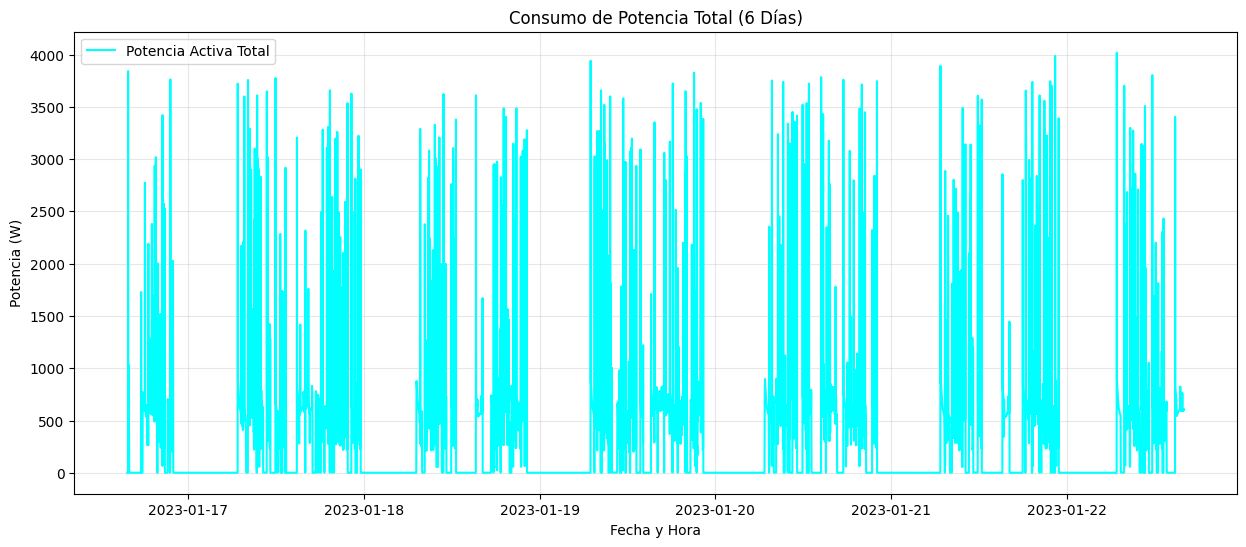

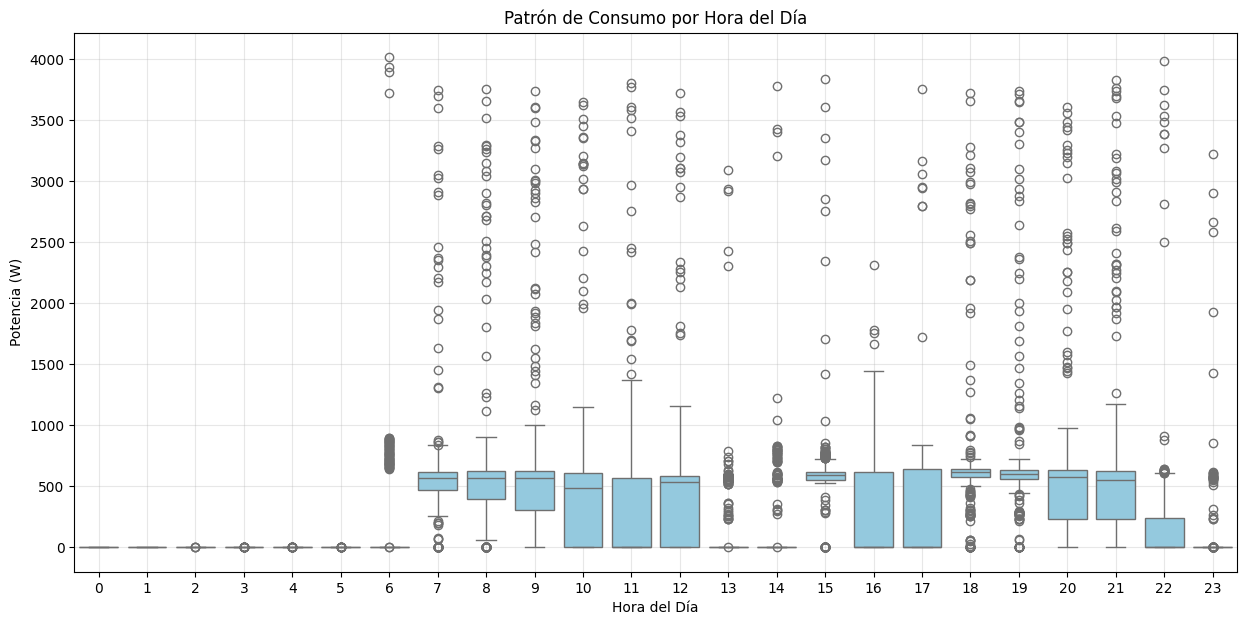

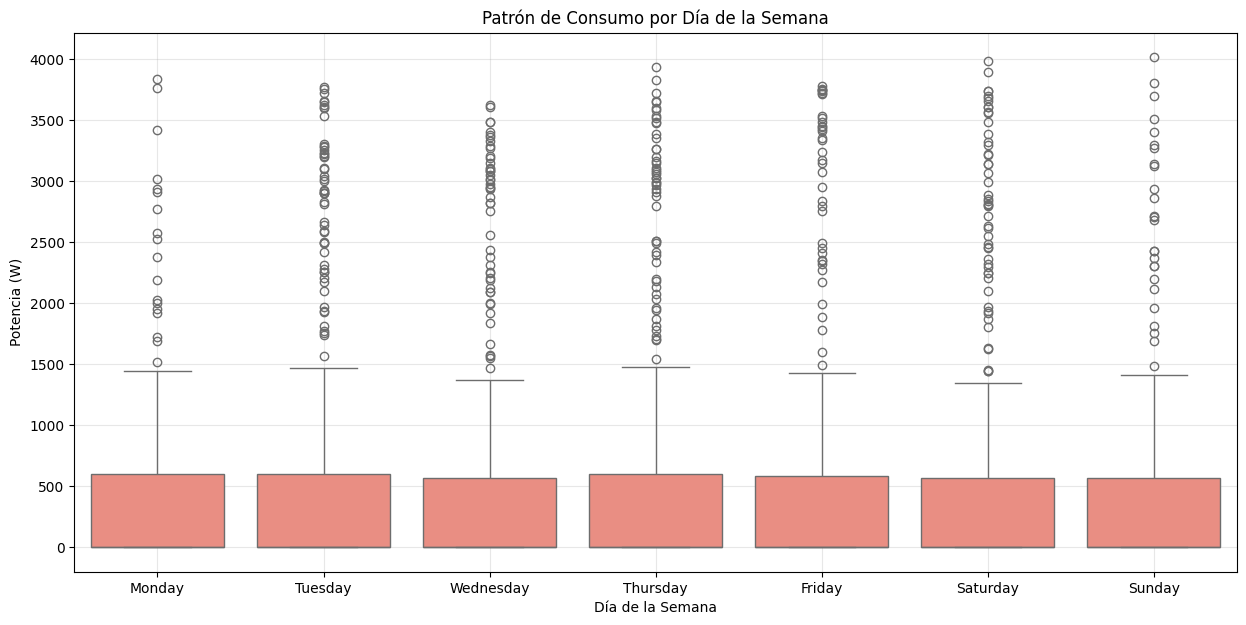

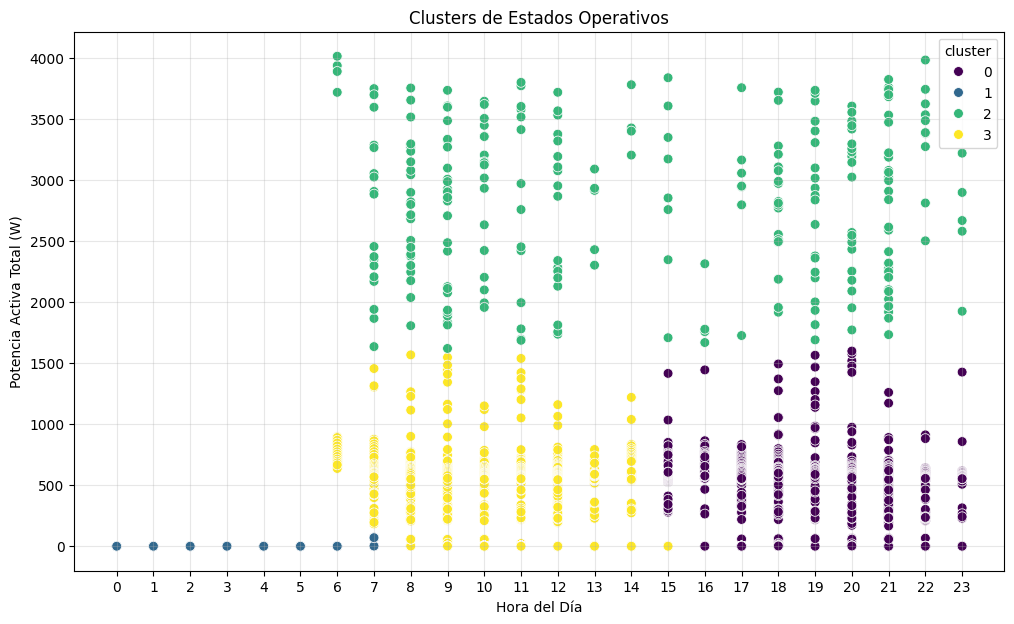

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

print("--- Iniciando Análisis Exploratorio de Datos Energéticos ---")

# --- PASO 1: Carga y Preparación de Datos ---
try:
    df = pd.read_csv('data_medicion.csv')
except FileNotFoundError:
    print("Error: El archivo  no fue encontrado.")
    exit()

# Limpieza y formateo
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.set_index('timestamp', inplace=True)

# Crear métricas clave (Potencia, Corriente, Voltaje)
df['total_act_power'] = ((df['a_min_act_power'] + df['a_max_act_power']) / 2) + \
                        ((df['b_min_act_power'] + df['b_max_act_power']) / 2) + \
                        ((df['c_min_act_power'] + df['c_max_act_power']) / 2)
df['total_avg_current'] = df['a_avg_current'] + df['b_avg_current'] + df['c_avg_current']
# Usamos el voltaje de la fase B como referencia, ya que parecía más estable en el diagnóstico
df['avg_voltage'] = df['b_avg_voltage']

# Crear características de tiempo
df['hora_del_dia'] = df.index.hour
df['dia_de_la_semana'] = df.index.dayofweek
df['dia_nombre'] = df.index.day_name()

# Crear un DataFrame limpio para el análisis
df_analysis = df[['total_act_power', 'total_avg_current', 'avg_voltage', 'hora_del_dia', 'dia_de_la_semana', 'dia_nombre']].copy()
print("Paso 1: Datos cargados y preparados.")

# --- PASO 2: Análisis General del Consumo ---
# Gráfico del consumo total a lo largo del tiempo
plt.figure(figsize=(15, 6))
plt.plot(df_analysis.index, df_analysis['total_act_power'], label='Potencia Activa Total', color='cyan')
plt.title('Consumo de Potencia Total (6 Días)')
plt.xlabel('Fecha y Hora')
plt.ylabel('Potencia (W)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('1_consumo_total.png')
print("Paso 2: Gráfico '1_consumo_total.png' generado.")

# Estadísticas clave
total_kwh = df_analysis['total_act_power'].sum() / 1000 / 60 # Potencia en W * 1 min / 60 min/h / 1000 W/kW
costo_estimado = total_kwh * 0.75 # Asumiendo S/ 0.75 por kWh
potencia_maxima = df_analysis['total_act_power'].max()
print("\n--- Estadísticas Generales (6 Días) ---")
print(f"Consumo Total Acumulado: {total_kwh:.2f} kWh")
print(f"Costo Estimado Total: S/ {costo_estimado:.2f}")
print(f"Pico Máximo de Potencia: {potencia_maxima:.2f} W")
print("-" * 40)

# --- PASO 3: Análisis de Patrones por Hora y Día ---
# Gráfico de cajas para el patrón horario
plt.figure(figsize=(15, 7))
sns.boxplot(x='hora_del_dia', y='total_act_power', data=df_analysis, color='skyblue')
plt.title('Patrón de Consumo por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Potencia (W)')
plt.grid(True, alpha=0.3)
plt.savefig('2_patron_horario.png')
print("Paso 3: Gráfico '2_patron_horario.png' generado.")

# Gráfico de cajas para el patrón diario
plt.figure(figsize=(15, 7))
sns.boxplot(x='dia_nombre', y='total_act_power', data=df_analysis, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color='salmon')
plt.title('Patrón de Consumo por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Potencia (W)')
plt.grid(True, alpha=0.3)
plt.savefig('3_patron_diario.png')
print("Paso 3: Gráfico '3_patron_diario.png' generado.")


# --- PASO 4: Clustering para Descubrir Estados Operativos ---
features_cluster = df_analysis[['hora_del_dia', 'total_act_power']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_cluster)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_analysis['cluster'] = kmeans.fit_predict(features_scaled)

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_analysis, x='hora_del_dia', y='total_act_power', hue='cluster', palette='viridis', s=50)
plt.title('Clusters de Estados Operativos')
plt.xlabel('Hora del Día')
plt.ylabel('Potencia Activa Total (W)')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.savefig('4_clusters_operativos.png')
print("Paso 4: Gráfico '4_clusters_operativos.png' generado.")

print("\n--- Análisis de Clusters ---")
cluster_summary = df_analysis.groupby('cluster')['total_act_power'].describe().round(2)
print(cluster_summary)
print("-" * 40)

print("\n--- ANÁLISIS COMPLETADO ---")